# **Python数据可视化速成教程——以S14世界赛辅助数据为例**

看到好多姐妹在为毕业论文画图表而感到烦恼。 

其实，用 Python画图并没有那么难。个人认为这是一项可以“边学边用”的技能 —— 如果你打算系统性学习，那当然最好，这样在长期项目中能少走弯路、提高效率；但如果只是为了在毕业论文里产出几张图，或者在 PPT 中放几张加分图，那快速上手、直接改代码模板也完全够用！

所以从实用角度来说，了解 Python 能帮我们做什么、能读懂部分代码，达到“能让 AI 帮忙、不被 AI 忽悠”的程度，其实就很棒了。

还有就是假如没有用过python还着急出结果的话，建议还是直接用excel或者其他的方法。第一次用python作图除了写码，可能还会碰到很多其他安装上的问题，当然在第一次用完之后，这些问题只要不换电脑基本都不会再出现了~所以推荐找一个比较空的时间段来尝试第一次画图~  


*注：我不是计算机专业的，代码也好多都是自学并不是写得很好，更加偏向于写最直接的代码而不是最有效率的代码，但好处对于画图来说就是我们只需要在意结果而不是过程~ 这个文档里的代码有很多不是最优解，但是是我认为最直观易懂的写法~所以假如真的想学习python和可视化的化，可以去看更专业的教程书籍，这里只是一些快速出图教程罢了。*

**完全没有挑事偏袒和分析，就纯数据，由于变量有限有一些图只有教学说明没有什么实际意义~**

## **目录**
==[目录]==


```{note}
**使用说明**
1. 在目录中寻找要画那种类型的图 
2. 找到相应的代码
3. 改相关参数/直接把代码扔进AI叫ta根据你的数据集画出和这个代码产出相似的图  
4. 去掉/加上部件（图例、标题等）
```

## **一些初始设置**
更加推荐去网上找教程，因为我也就安装过一次用到了现在😀   
我一般写码用的是**Visual Studio Code**（注意不是Visual Studio），所以参照我的习惯，先要安装两样东西： 

1. **Python 本体**（建议从官网 https://www.python.org/ 下载）
2. **Visual Studio Code**（注意，不是 Visual Studio！）

在 VS Code 中，还需要安装一个插件：**Jupyter Notebook**。  
Jupyter 是一种类似 Word/Excel 的“文档格式”——扩展名是 `.ipynb`。它的好处是可以将代码分成一格一格，每一格都可以单独运行，非常适合我们一边写一边测试。

一般教授也会推荐下载 Jupyter 自带的编辑器，使用界面类似网页，也很好上手。

Jupyter Notebook 里有两种“格子”：
- **Markdown**：写文字说明用
- **Code**：写代码用

写好代码后，只需要点击“播放键”就能看到结果啦~


## **熟悉自己的数据**
在真的开始可视化之前，需要先做一些整理工作，正好可以学习一些基础的Python代码。

处理数据最常用的工具是 **pandas** —— 可以理解为Python的“数据处理工具箱”。    
在 Python 中，不同的功能通常由不同的工具箱（也叫 package）来提供，而 pandas 里有很多专门用来处理数据的小工具（我们叫做函数 function）。   

需要在vscode的terminal里输入 `pip install pandas`来安装。



用最基础的代码大概有几步可以做：
1. 读取数据
2. 选择数据：选择自己想要的部分（可以去除一些不需要的变量和筛选掉某些数据）
3. 清洗数据：处理缺失值、统一格式（但有时候缺失值（NaN）本身也有意义，删的时候要小心~）

这个说明我用的数据是S14四位进入世界赛的辅助的全年除德杯数据。每一行代表一个小局。

### 读取数据
import是指导入`pandas`这个数据处理工具包，并把它简称为 pd
这样每次用这个工具包的时候，只需要写pd就可以了~

In [1]:
import pandas as pd

我们现在要读取一个数据文件。为了代码简便，这个文件建议事先用 Excel 整理过，并保存成 CSV 格式（UTF-8 编码，逗号分隔）。

可以提前把不需要的表头或说明行删掉，只保留数据本体和第一行变量名称。

为了让路径更简单，把 CSV 文件和这个 .ipynb 文件放在同一个文件夹里。


等号左边是给这个表格起的名字（df 是 “dataframe” 的缩写，意思是“数据表格”），什么名字都可以。

In [2]:
df = pd.read_csv("sup_df.csv")

可以用 .head() 函数预览  .head(3) 表示只显示前 3 行

In [3]:
df.head(3)

Unnamed: 0      Champion  Result        Date        Game player  \
0           0        Maokai  Defeat  2024-10-26  WBG vs BLG  Crisp   
1           1  Renata Glasc  Defeat  2024-10-26  WBG vs BLG  Crisp   
2           2  Renata Glasc  Defeat  2024-10-26  WBG vs BLG  Crisp   

               Tournament  duration_minutes  K  D  A match_result match_type  
0  Worlds Main Event 2024         27.750000  0  5  6       Defeat        BO5  
1  Worlds Main Event 2024         31.616667  1  3  9       Defeat        BO5  
2  Worlds Main Event 2024         39.283333  0  3  8       Defeat        BO5

去掉不想要的变量

In [4]:
df = df.drop(columns=["Unnamed: 0"])

含有数字的列的基本统计信息

In [5]:
df.describe()

duration_minutes           K           D           A
count        484.000000  484.000000  484.000000  484.000000
mean          31.991460    0.797521    3.016529    9.654959
std            5.407449    0.943713    2.106810    4.978916
min           21.833333    0.000000    0.000000    0.000000
25%           28.212500    0.000000    1.000000    6.000000
50%           31.158333    1.000000    3.000000   10.000000
75%           35.316667    1.000000    4.000000   13.000000
max           53.000000    5.000000   11.000000   26.000000

用value_counts来统计每种数据出现过多少次——这里就代表着每位选手有多少小局比赛。

In [6]:
df["player"].value_counts().reset_index()

player  count
0     ON    139
1  meiko    131
2  Crisp    129
3   Hang     85

也可以放在后面的括号里。函数可以想现在这样叠加，但是顺序需要注意~

In [7]:
df.value_counts(["player","Tournament"]).reset_index().head(5)

player       Tournament  count
0  Crisp  LPL Spring 2024     37
1  meiko  LPL Spring 2024     37
2     ON  LPL Spring 2024     35
3   Hang  LPL Spring 2024     25
4     ON         MSI 2024     22

找到Tournament这一列里面有哪些独特的数据。Tournament是赛事名称变量，所以这里独特的值代表着这些选手参加过的赛事名单。

In [8]:
df["Tournament"].unique()

array(['Worlds Main Event 2024', 'LPL Regional Finals 2024',
       'LPL Summer Playoffs 2024', 'LPL Summer Season 2024',
       'LPL Summer Placements 2024', 'LPL Spring Playoffs 2024',
       'LPL Spring 2024', 'Esports World Cup 2024', 'MSI 2024'],
      dtype=object)

除了变量本身以外，我们也可以考虑**去掉某些“不合适”的数据行**。

比如在这个辅助数据表中，`Tournament` 这一列记录了比赛名称，我们发现其中包含 “Esports World Cup 2024”（石油杯）这样的赛事。  
这个比赛可能在评估 LPL 辅助选手时不太合适，所以我们可能会选择将它从分析中剔除。

这里我不会真正删除这部分数据，只是做一个演示。


>[!TIP]Python逻辑判断符号

| 符号 | 含义             | 示例                          |
|------|------------------|-------------------------------|
| `==` | 等于             | `df["player"] == "Meiko"`     |
| `!=` | 不等于           | `df["Tournament"] != "Esports World Cup 2024"` |
| `&`  | “且”（并且）     | `(A条件) & (B条件)`           |
| `\|`  | “或”             | `(A条件) \| (B条件)`           |

**注意**：多个条件组合时，外层需要用小括号括起来~


In [9]:
# 去掉石油杯的记录
df_filtered = df[df["Tournament"] != "Esports World Cup 2024"]

In [10]:
# 验证一下
df_filtered["Tournament"].value_counts()

Tournament
LPL Spring 2024               134
LPL Summer Season 2024         78
LPL Summer Placements 2024     59
LPL Summer Playoffs 2024       54
Worlds Main Event 2024         52
LPL Spring Playoffs 2024       47
MSI 2024                       38
LPL Regional Finals 2024       11
Name: count, dtype: int64

也可以查看选择你想要的信息，也可以通过比如`table=`保存下来,也可以不写直接看
比如我想要看ON在石油杯的记录，那这个记录就需要满足两个条件——(player是ON)**并且**(Tournament是Esports World Cup)

In [11]:
on_shiyou_df = df[(df["player"] == "ON") & (df["Tournament"] == "Esports World Cup 2024")]
on_shiyou_df

Champion   Result        Date       Game player              Tournament  \
266     Rakan   Defeat  2024-07-04  BLG vs T1     ON  Esports World Cup 2024   
267  Nautilus  Victory  2024-07-04  BLG vs T1     ON  Esports World Cup 2024   
268  Nautilus   Defeat  2024-07-04  BLG vs T1     ON  Esports World Cup 2024   

     duration_minutes  K  D   A match_result match_type  
266         30.500000  0  5   4       Defeat        BO3  
267         31.750000  2  2  13       Defeat        BO3  
268         39.016667  2  4   4       Defeat        BO3

In [12]:
# 最后可以粗暴地dropna，去掉没有记录的信息，这样在制表过程中会方便很多
df = df.dropna()

## 可视化
可以可视化哪些内容呢？我一般会在写代码之前先规划好我的图表会是什么样子的。然后在官网上找相应的代码做出修改。
有条件的姐妹可以直接找可视化的python package说明来找灵感。比如说plotly
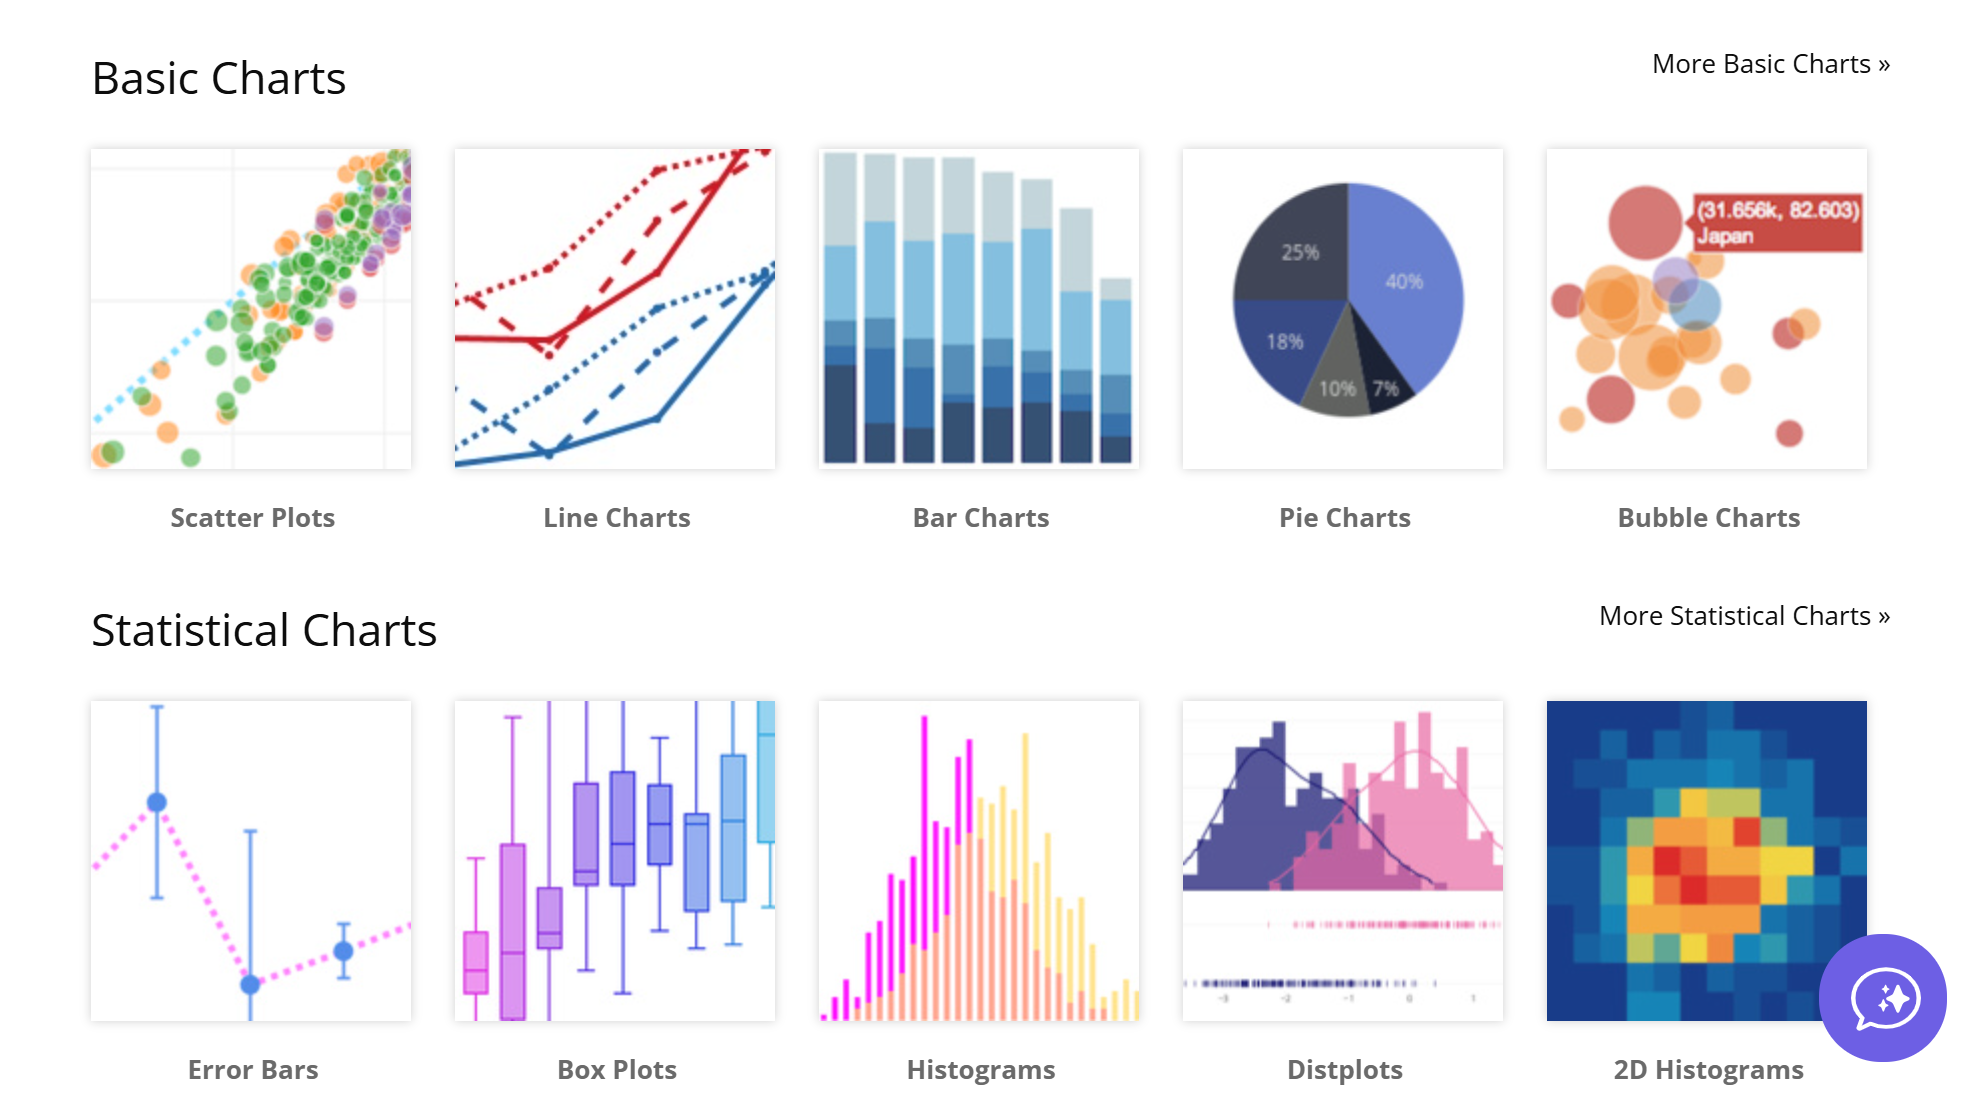
seaborn
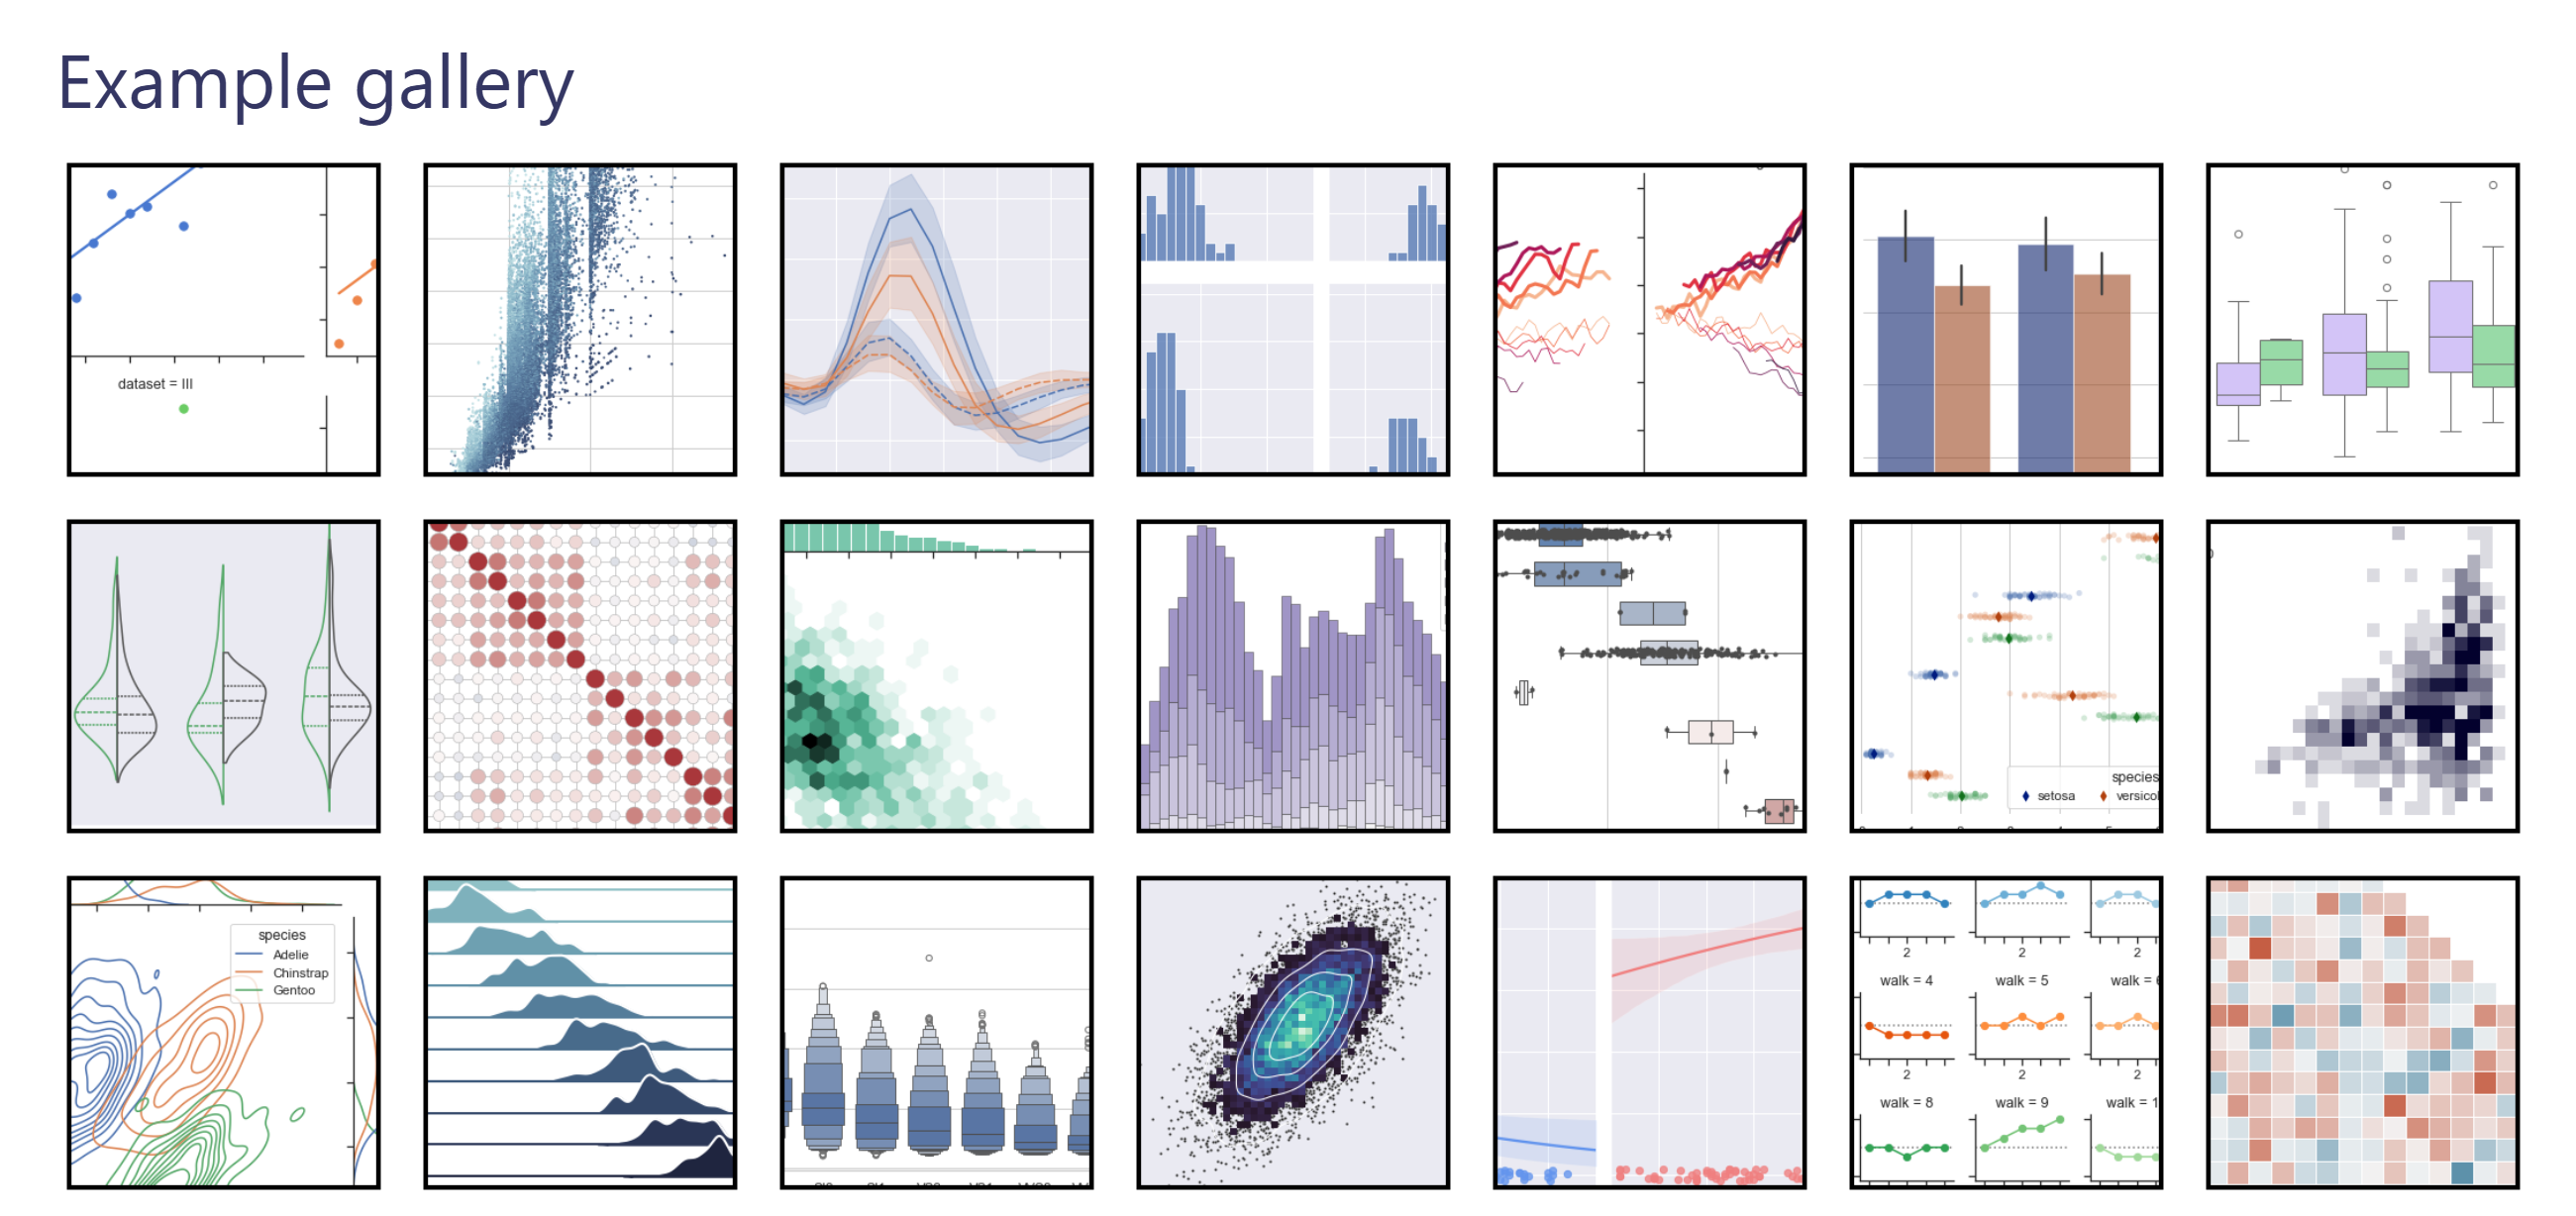



我个人一般使用的是 **Seaborn**。

在教学中最常见的绘图工具其实是 **matplotlib**，但它的问题是太繁琐了：图中的每一个元素（比如坐标轴、图例、颜色等）都需要手动设置。

相对来说，**Seaborn**在matplotlib基础上，用相同的逻辑只需要输入少量变量就能自动生成图。但是Seaborn不支持中文标签（需要手动输入）……所以这里我们选用 **Plotly**。虽然豆瓣可以贴出的图暂时用不上，但是Plotly的图表是自动“交互式”的，可以在图上移动鼠标查看具体数据值，有些时候图画出来真的显得很酷炫很专业~

写这份指南的原因之一也是感觉这些网站对于在国内的姐妹来说比较难搜到，然后真的写起来一个一个翻，没有经验的话，确实很费时间和精力。

### 散点图（scatter plot）
相对来说图其实比画表要简单一点，所以我们从图开始。首先，先安装`pip install plotly`。

#### 图1：小局KDA和时长的散点图
我们可以画一个每小局KDA和小局时长的散点图~先计算出每一小局KDA。

In [13]:
# D值可能为0
df["D_safe"] = df["D"].replace(0, 1)

# 直接做除法计算 KDA
df["KDA"] = (df["K"] + df["A"]) / df["D_safe"]

# lambda有可能比较复杂，但是一次成型
# df["KDA"] = df.apply(lambda row: (row["K"] + row["A"]) / (row["D"] if row["D"] != 0 else 1), axis=1)

#随便看看：预览一些死亡数比较高的小局~(D倒序，KDA正序)
df.sort_values(by = ["D","KDA"], ascending = [False,True]).head(5)

Champion  Result        Date                Game player  \
285      Ashe  Defeat  2024-05-19          GEN vs BLG     ON   
64       Rell  Defeat  2024-06-21          NIP vs WBG  Crisp   
240      Rell  Defeat  2024-08-21  BLG vs Top Esports     ON   
366   Alistar  Defeat  2024-08-21  BLG vs Top Esports  meiko   
283  Nautilus  Defeat  2024-05-19          GEN vs BLG     ON   

                     Tournament  duration_minutes  K   D   A match_result  \
285                    MSI 2024         39.233333  2  11  11       Defeat   
64   LPL Summer Placements 2024         31.333333  0  10   5       Defeat   
240    LPL Summer Playoffs 2024         28.416667  3  10   6      Victory   
366    LPL Summer Playoffs 2024         30.550000  1  10  17       Defeat   
283                    MSI 2024         47.233333  0   9   3       Defeat   

    match_type  D_safe       KDA  
285        BO5      11  1.181818  
64         BO3      10  0.500000  
240        BO5      10  0.900000  
366        BO5      10  1.800000  
283        BO5       9  0.333333

  
用 Plotly Express 画散点图很方便，而且有很多可选项可以自由组合。  
 
| 参数名         | 用法                          |
|----------------|-------------------------------|
| `x`, `y`       | 横轴、纵轴变量                |
| `color`        | 用不同颜色区分类别            |
| `size`         | 点的大小反映另一个变量        |
| `symbol`       | 用不同图形（圆/方/星等）区分类别 |
| `opacity`      | 设置透明度（0~1）             |
| `trendline`    | 加拟合线，可选 `"ols"`, `"lowess"` |
| `marginal_x/y` | 添加边缘图（箱型图 box, 直方图 hist） |
| `hover_data`   | 鼠标悬浮时显示的字段           |
| `template`     | 图的风格（如 `"seaborn"`, `"plotly_white"`） |

In [14]:
import plotly.express as px

fig = px.scatter(
    df,
    x="duration_minutes",        # 横轴：比赛时长
    y="KDA",                     # 纵轴：KDA 值
    color="player",              # 用不同颜色区分选手
    opacity=0.7,                 # 散点透明度
    trendline="ols",             # 拟合线：普通最小二乘（OLS）
    template="seaborn",          # 美化风格
    marginal_y="box",            # 右侧加上 KDA 的箱型图
    marginal_x="box"             # 上方加上时长的箱型图
)

# 设置图表标题与轴标签
fig.update_layout(
    title="图1.选手比赛时长 vs KDA 表现",
    xaxis_title="比赛时长（分钟）",
    yaxis_title="KDA",
)

fig.show()

用相同的模板和数据，你可以试试各种各种的搭配

In [15]:
import plotly.express as px

fig = px.scatter(
    df,
    x="duration_minutes",        # 横轴：比赛时长
    y="KDA",                     # 纵轴：KDA 值
    color="player",              # 用颜色区分不同选手
    
    # size = (df["K"] + df["A"]),  # 点大小可以表示输出/参团强度等
    
    symbol = "Result",           # 用符号表示比赛结果（Victory / Defeat）
    opacity=0.7,                 # 散点透明度，防止遮挡
    
    # trendline="ols",            # 加上线性趋势线（也可以是 "lowess"）
    
    template="seaborn",          # 使用 seaborn 风格
    
    # marginal_y="box",           # 右边加 KDA 的箱型图
    # marginal_x="box"            # 上方加时长的箱型图
)

fig.update_layout(
    title="选手比赛时长 vs KDA 表现",
    xaxis_title="比赛时长（分钟）",
    yaxis_title="KDA",
)

fig.show()

### 箱装图（boxplot）  
还有比如我想要看每位选手每个赛段的KDA分布情况。
#### 图2：每个赛段KDA的箱型图

In [16]:
import plotly.express as px

fig = px.box(
    df,
    x="Tournament",           # 横轴为比赛名称
    y="KDA",                  # 纵轴为 KDA 值
    color="player",           # 按选手上色
    template="seaborn"
)

# 添加图表标题和坐标轴名称
fig.update_layout(
    title="不同赛事中各辅助选手的KDA分布",
    xaxis_title="赛事名称",
    yaxis_title="KDA",
    title_font_size=18,
    legend_title_text="选手",
    margin=dict(l=40, r=40, t=60, b=40)
)

fig.show()


但是还有可以提升的地方，比如，比赛顺序按照实际时间排列，而不是默认的字母排序，还有要注意选手颜色在各图中保持一致（基本不要不重新sort表格，默认是一致的），方便横向对比。

In [17]:
import plotly.express as px

# 先按照时间排序比赛名称
tournament_order = df.sort_values("Date")["Tournament"].drop_duplicates().tolist()

# 设定选手顺序（确保颜色一致）
player_order = sorted(df["player"].unique())

fig = px.box(
    df,
    x="Tournament",           # 横轴为比赛名称
    y="KDA",                  # 纵轴为 KDA 值
    color="player",           # 按选手上色
    template="seaborn",
    category_orders={
        "Tournament": tournament_order,
        "player": player_order
    },
)


# 添加图表标题和坐标轴名称
fig.update_layout(
    title="图2.不同赛事中各辅助选手的KDA分布",
    xaxis_title="赛事名称",
    yaxis_title="KDA",
    title_font_size=18,
    legend_title_text="选手",
    margin=dict(l=40, r=40, t=60, b=40)
)

fig.show()


#### 图3：每个赛段KDA的箱型图，分选手
还可以每位选手单独分图显示~这种比较类型的，我其实更加倾向于图2，图3的形式可能更加适合不同类型的变量~

In [18]:
# 先按照时间排序比赛名称
tournament_order = df.sort_values("Date")["Tournament"].drop_duplicates().tolist()

# 设定选手顺序（确保颜色一致）
player_order = sorted(df["player"].unique())

fig = px.box(
    df,
    x="Tournament",
    y="KDA",
    color="player",
    facet_col="player",
    category_orders={
        "Tournament": tournament_order,
        "player": player_order
    },
    template="seaborn",
    points="outliers"  # 也可设为 "all" 显示全部点
)

fig.update_layout(
    title="图3.不同赛事中各辅助选手的 KDA 分布",
    xaxis_title="赛事",
    yaxis_title="KDA",
    showlegend=False,  # 隐藏图例
    margin=dict(t=60, l=40, r=40, b=40)
)

fig.show()

### 分布曲线图（distribution plot）
#### 图4. 各选手KDA分布曲线图

In [19]:
# 提取选手名
players = df["player"].unique()

# 为每位选手构建一个 KDA 列表（去除缺失值）
kda_groups = [df[df["player"] == player]["KDA"].dropna().tolist()
              for player in players]

print(kda_groups)


[[1.2, 3.3333333333333335, 2.6666666666666665, 18.0, 5.333333333333333, 3.0, 5.0, 8.0, 6.0, 3.2, 4.0, 6.0, 1.5, 1.5, 2.25, 1.2, 4.333333333333333, 0.8, 6.0, 7.5, 1.5, 0.25, 0.6666666666666666, 1.3333333333333333, 3.5, 0.25, 2.5, 5.5, 3.0, 7.0, 3.25, 6.5, 5.0, 1.7142857142857142, 0.8, 13.0, 1.2, 0.8888888888888888, 1.0, 0.6, 16.0, 3.0, 1.0, 16.0, 2.6, 5.0, 8.0, 15.0, 1.0, 0.6, 13.0, 2.75, 3.0, 1.0, 1.4285714285714286, 6.0, 10.0, 0.3333333333333333, 5.333333333333333, 1.0, 6.0, 6.333333333333333, 9.0, 3.6666666666666665, 0.5, 3.0, 0.8571428571428571, 0.25, 17.0, 3.25, 0.75, 9.0, 0.3333333333333333, 13.0, 1.4, 5.0, 2.0, 3.0, 2.4, 4.0, 2.25, 1.0, 5.0, 0.0, 2.5, 10.0, 16.0, 4.0, 0.8333333333333334, 1.3333333333333333, 9.5, 13.0, 10.0, 5.333333333333333, 7.0, 5.5, 4.5, 8.0, 1.6, 1.0, 0.5, 3.0, 14.0, 8.0, 1.0, 4.0, 13.0, 2.8, 1.5, 3.0, 1.8, 0.75, 5.0, 1.25, 9.0, 8.0, 4.0, 13.0, 1.8, 0.2857142857142857, 13.0, 2.6666666666666665, 1.0, 0.25, 2.5, 17.0, 7.5, 13.0, 10.0], [1.0, 0.42857142857142855

`kda_groups = [
    df[df["player"] == player]["KDA"].dropna().tolist()
    for player in players
]`
这行代码看起来复杂，其实可以理解为，我们要为每个选手，提取出他所有比赛中的 KDA 数值，存成一个列表。所有选手的列表再组成一个大列表。

1. `for player in players`
遍历所有选手

players 是一个列表，比如：["Meiko", "Crisp", "Hang", "ON"]

2. `df[df["player"] == player]`
这是“过滤数据”的方式

只保留这个选手打的所有比赛

举个例子：df[df["player"] == "Meiko"] 只留下 Meiko 的比赛记录

3. `["KDA"]`
从刚才留下的比赛记录中，只取出 KDA 那一列

4. `.dropna()`
去掉空值（有些比赛可能没有 KDA 数据）

5. `.tolist()`
把这一列转成 Python 里的普通列表

In [20]:
import plotly.figure_factory as ff
# 创建分布图（平滑曲线）
fig = ff.create_distplot(
    kda_groups,
    group_labels=players,
    show_hist=False,     # 不显示直方图，只保留平滑线
    show_rug=False       # 不显示底部小tick线
)

# 美化图表 & 去除图例
fig.update_layout(
    template="seaborn",
    title="图4.KDA 分布曲线图（各辅助选手）",
    xaxis_title="KDA",
    yaxis_title="密度",
    showlegend=True
)

fig.show()

### 表格

这里我们用的package叫great_tables，所以我们需要`pip install great_tables`和`pip install polars`来安装。  

#### 表1： ON石油杯小局数据
可以先做一个最简单的表格，就拿刚刚ON石油杯的表现（我看BLG比赛比较多🕶）：

In [21]:
from great_tables import GT, loc, style

In [22]:
on_shiyou_df

Champion   Result        Date       Game player              Tournament  \
266     Rakan   Defeat  2024-07-04  BLG vs T1     ON  Esports World Cup 2024   
267  Nautilus  Victory  2024-07-04  BLG vs T1     ON  Esports World Cup 2024   
268  Nautilus   Defeat  2024-07-04  BLG vs T1     ON  Esports World Cup 2024   

     duration_minutes  K  D   A match_result match_type  
266         30.500000  0  5   4       Defeat        BO3  
267         31.750000  2  2  13       Defeat        BO3  
268         39.016667  2  4   4       Defeat        BO3

比如，这里我做表格的话我会觉得可能信息有些过多了，可以减少一些，因为我们已经明确知道这张表格只有ON在石油杯的表现了。

In [23]:
# 选取我需要的变量
on_shiyou_df = on_shiyou_df[["Champion","Result","duration_minutes","K","D","A"]]
# 时长这一栏小数点后有点多
on_shiyou_df["duration_minutes"] = on_shiyou_df["duration_minutes"].round(2)
# 重新命名一下
on_shiyou_df = on_shiyou_df.rename(columns = {"Champion": "英雄","Result":"赛果","duration_minutes":"时长","K":"击杀","D":"死亡","A":"助攻"})

In [24]:
on_shiyou_df

英雄       赛果     时长  击杀  死亡  助攻
266     Rakan   Defeat  30.50   0   5   4
267  Nautilus  Victory  31.75   2   2  13
268  Nautilus   Defeat  39.02   2   4   4

In [25]:
# 生成图片
GT(on_shiyou_df)

GT(_tbl_data=           英雄       赛果     时长  击杀  死亡  助攻
266     Rakan   Defeat  30.50   0   5   4
267  Nautilus  Victory  31.75   2   2  13
268  Nautilus   Defeat  39.02   2   4   4, _body=<great_tables._gt_data.Body object at 0x000001A120103EC0>, _boxhead=Boxhead([ColInfo(var='英雄', type=<ColInfoTypeEnum.default: 1>, column_label='英雄', column_align='left', column_width=None), ColInfo(var='赛果', type=<ColInfoTypeEnum.default: 1>, column_label='赛果', column_align='left', column_width=None), ColInfo(var='时长', type=<ColInfoTypeEnum.default: 1>, column_label='时长', column_align='right', column_width=None), ColInfo(var='击杀', type=<ColInfoTypeEnum.default: 1>, column_label='击杀', column_align='right', column_width=None), ColInfo(var='死亡', type=<ColInfoTypeEnum.default: 1>, column_label='死亡', column_align='right', column_width=None), ColInfo(var='助攻', type=<ColInfoTypeEnum.default: 1>, column_label='助攻', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001A11C9C3DA0>, _spanners=Spanners([]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001A11EAEC770>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_col

In [26]:
table = GT(on_shiyou_df)

(
    table

    # Table header ----
    .tab_header(
        title = "表1. ON选手石油杯比赛小局数据",
        subtitle = "2024-7-4，BLG vs T1"
    )
)

GT(_tbl_data=           英雄       赛果     时长  击杀  死亡  助攻
266     Rakan   Defeat  30.50   0   5   4
267  Nautilus  Victory  31.75   2   2  13
268  Nautilus   Defeat  39.02   2   4   4, _body=<great_tables._gt_data.Body object at 0x000001A1201640B0>, _boxhead=Boxhead([ColInfo(var='英雄', type=<ColInfoTypeEnum.default: 1>, column_label='英雄', column_align='left', column_width=None), ColInfo(var='赛果', type=<ColInfoTypeEnum.default: 1>, column_label='赛果', column_align='left', column_width=None), ColInfo(var='时长', type=<ColInfoTypeEnum.default: 1>, column_label='时长', column_align='right', column_width=None), ColInfo(var='击杀', type=<ColInfoTypeEnum.default: 1>, column_label='击杀', column_align='right', column_width=None), ColInfo(var='死亡', type=<ColInfoTypeEnum.default: 1>, column_label='死亡', column_align='right', column_width=None), ColInfo(var='助攻', type=<ColInfoTypeEnum.default: 1>, column_label='助攻', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001A11C9A19A0>, _spanners=Spanners([]), _heading=Heading(title='表1. ON选手石油杯比赛小局数据', subtitle='2024-7-4，BLG vs T1', preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001A120165370>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D

### 表格进阶——pivot和groupby
*其实表格很多时候要比单纯画图要复杂，因为表格你需要把每一行每一列都想得很清楚，并且用码来表现出来。而且excel的透视（？）功能也可以达到一样的效果~所以假如不想可视化表的话可以直接跳到后面画图的部分。*    

#### 表2： 不同赛制的场数胜率比较, 按赛制  
有些时候，我们想要更复杂一些的数据统计，比如每位选手在每个大局和小局的数据。这种时候我们就需要先提前想好自己需要什么数据然后再整合出来。
比如，我最后的图是要这样的：
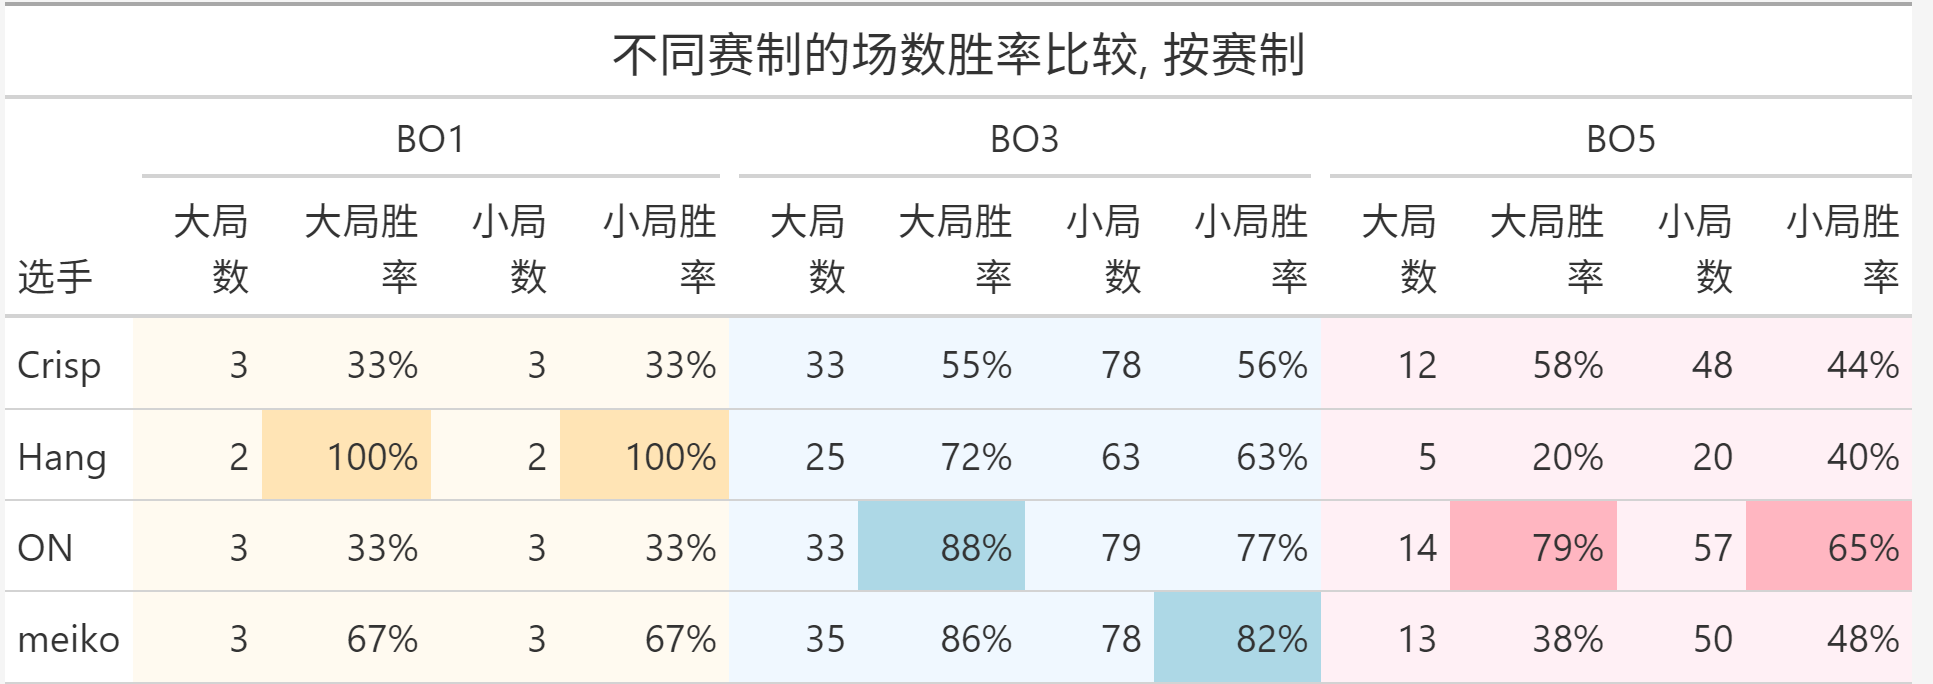

从数据上看，我需要每一种比赛形式的大局小局数和胜率。  

大局数和小局数是不一样的算法——小局数只要数每位选手一共有多少行，其中多少是胜利就行了，但是大局数，我们得先整理出每位选手的每个大局才行。

这个时候就可以用到`groupby`。即先把表格里的数据按某个条件分好组，再对每组做统计。


In [27]:
df_game = df.groupby(["player", "match_type"]).apply(
    lambda group: pd.Series({
        "小局数": group["Result"].count(),
        "小局胜率": (group["Result"] == "Victory").mean().round(2)
    })
).reset_index()
df_game.head(3)

C:\Users\Yangge Xu\AppData\Local\Temp\ipykernel_27032\768748507.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



player match_type   小局数  小局胜率
0  Crisp        BO1   3.0  0.33
1  Crisp        BO3  78.0  0.56
2  Crisp        BO5  48.0  0.44

这里，  
`groupby(["player", "match_type"])`：意思是“把数据按选手和赛制分组”

`apply(...)`：对每组分别执行一个自定义的函数

`group["Result"] == "Victory"`：判断哪些是胜利（得到 True/False 的列表）

`.mean()`：True=1, False=0，所以平均值就是胜率

In [28]:
# 假设同一天两个队之间只会有一个大局
match_result = df[["player","Game","Date","match_result","match_type"]]
df_match = match_result.groupby(["player", "match_type"]).apply(
    lambda group: pd.Series({
        "大局数": group["match_result"].count(),
        "大局胜率": (group["match_result"] == "Victory").mean()
    })
).reset_index()
df_match.head(3)

C:\Users\Yangge Xu\AppData\Local\Temp\ipykernel_27032\593601563.py:3: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



player match_type   大局数      大局胜率
0  Crisp        BO1   3.0  0.333333
1  Crisp        BO3  78.0  0.512821
2  Crisp        BO5  48.0  0.687500

[!TIP]合并表格
[merge cheat sheet]

In [29]:
#合并表格
df_winrate_summary = pd.merge(df_game, df_match, on=["player", "match_type"])

# 四舍五入
df_winrate_summary[["大局数", "小局数"]] = df_winrate_summary[["大局数", "小局数"]].round(0)
df_winrate_summary[["大局胜率", "小局胜率"]] = df_winrate_summary[["大局胜率", "小局胜率"]].round(2)

df_winrate_summary.head()

player match_type   小局数  小局胜率   大局数  大局胜率
0  Crisp        BO1   3.0  0.33   3.0  0.33
1  Crisp        BO3  78.0  0.56  78.0  0.51
2  Crisp        BO5  48.0  0.44  48.0  0.69
3   Hang        BO1   2.0  1.00   2.0  1.00
4   Hang        BO3  63.0  0.63  63.0  0.71

在这里我们还需要用到pivot来让match_type来作为列名。

In [30]:
pivot_df = df_winrate_summary.pivot(index="player", columns="match_type")
pivot_df

小局数              小局胜率              大局数              大局胜率        \
match_type  BO1   BO3   BO5   BO1   BO3   BO5  BO1   BO3   BO5   BO1   BO3   
player                                                                       
Crisp       3.0  78.0  48.0  0.33  0.56  0.44  3.0  78.0  48.0  0.33  0.51   
Hang        2.0  63.0  20.0  1.00  0.63  0.40  2.0  63.0  20.0  1.00  0.71   
ON          3.0  79.0  57.0  0.33  0.77  0.65  3.0  79.0  57.0  0.33  0.86   
meiko       3.0  78.0  50.0  0.67  0.82  0.48  3.0  78.0  50.0  0.67  0.82   

                  
match_type   BO5  
player            
Crisp       0.69  
Hang        0.15  
ON          0.77  
meiko       0.34

这里其实已经可以算完成了，但是假如想把图做得更漂亮一些的话，可以尝试用great_tables。  
great_tables这个package的特点就是他不能读取有多层列名的表格，比如现在pivot_df，他每一列的名称都是（第一行，第二行）的形式。

In [31]:
pivot_df.columns

MultiIndex([( '小局数', 'BO1'),
            ( '小局数', 'BO3'),
            ( '小局数', 'BO5'),
            ('小局胜率', 'BO1'),
            ('小局胜率', 'BO3'),
            ('小局胜率', 'BO5'),
            ( '大局数', 'BO1'),
            ( '大局数', 'BO3'),
            ( '大局数', 'BO5'),
            ('大局胜率', 'BO1'),
            ('大局胜率', 'BO3'),
            ('大局胜率', 'BO5')],
           names=[None, 'match_type'])

In [32]:
pivot_df.columns = [f"{col[0]}_{col[1]}" for col in pivot_df.columns]  # 把多层列名拍扁
pivot_df = pivot_df.reset_index()
pivot_df.head()

player  小局数_BO1  小局数_BO3  小局数_BO5  小局胜率_BO1  小局胜率_BO3  小局胜率_BO5  大局数_BO1  \
0  Crisp      3.0     78.0     48.0      0.33      0.56      0.44      3.0   
1   Hang      2.0     63.0     20.0      1.00      0.63      0.40      2.0   
2     ON      3.0     79.0     57.0      0.33      0.77      0.65      3.0   
3  meiko      3.0     78.0     50.0      0.67      0.82      0.48      3.0   

   大局数_BO3  大局数_BO5  大局胜率_BO1  大局胜率_BO3  大局胜率_BO5  
0     78.0     48.0      0.33      0.51      0.69  
1     63.0     20.0      1.00      0.71      0.15  
2     79.0     57.0      0.33      0.86      0.77  
3     78.0     50.0      0.67      0.82      0.34

再用great_tables美化

In [33]:
import polars as pl
import polars.selectors as cs
from great_tables import GT, loc, style

# 提取列名：按赛制分组
bo1 = [col for col in pivot_df.columns if col.endswith("_BO1")]
bo3 = [col for col in pivot_df.columns if col.endswith("_BO3")]
bo5 = [col for col in pivot_df.columns if col.endswith("_BO5")]

# 创建表格对象并格式化展示
great_table = (
    GT(pivot_df)
    .tab_header("不同赛制的场数胜率比较（按赛制分组）")
    
    .tab_spanner(label="BO1", columns=bo1)
    .tab_spanner(label="BO3", columns=bo3)
    .tab_spanner(label="BO5", columns=bo5)

    .cols_label(
        player = "选手",
        大局数_BO1 = "大局数", 小局数_BO1 = "小局数", 大局胜率_BO1 = "大局胜率", 小局胜率_BO1 = "小局胜率",
        大局数_BO3 = "大局数", 小局数_BO3 = "小局数", 大局胜率_BO3 = "大局胜率", 小局胜率_BO3 = "小局胜率",
        大局数_BO5 = "大局数", 小局数_BO5 = "小局数", 大局胜率_BO5 = "大局胜率", 小局胜率_BO5 = "小局胜率"
    )

    .fmt_number(columns=[col for col in pivot_df.columns if "数" in col], compact=True, decimals=0)
    .fmt_percent(columns=[col for col in pivot_df.columns if "率" in col], decimals=0)

    .tab_style(style=style.fill(color="floralwhite"), locations=loc.body(columns=bo1))
    .tab_style(style=style.fill(color="aliceblue"), locations=loc.body(columns=bo3))
    .tab_style(style=style.fill(color="lavenderblush"), locations=loc.body(columns=bo5))

    # （可选）手动高亮表现突出的选手某列
    .tab_style(style=style.fill(color="moccasin"), locations=[
        loc.body(columns="大局胜率_BO1", rows=[1]),
        loc.body(columns="小局胜率_BO1", rows=[1])
    ])
)
great_table

GT(_tbl_data=  player  小局数_BO1  小局数_BO3  小局数_BO5  小局胜率_BO1  小局胜率_BO3  小局胜率_BO5  大局数_BO1  \
0  Crisp      3.0     78.0     48.0      0.33      0.56      0.44      3.0   
1   Hang      2.0     63.0     20.0      1.00      0.63      0.40      2.0   
2     ON      3.0     79.0     57.0      0.33      0.77      0.65      3.0   
3  meiko      3.0     78.0     50.0      0.67      0.82      0.48      3.0   

   大局数_BO3  大局数_BO5  大局胜率_BO1  大局胜率_BO3  大局胜率_BO5  
0     78.0     48.0      0.33      0.51      0.69  
1     63.0     20.0      1.00      0.71      0.15  
2     79.0     57.0      0.33      0.86      0.77  
3     78.0     50.0      0.67      0.82      0.34  , _body=<great_tables._gt_data.Body object at 0x000001A12029AFC0>, _boxhead=Boxhead([ColInfo(var='player', type=<ColInfoTypeEnum.default: 1>, column_label='选手', column_align='left', column_width=None), ColInfo(var='小局数_BO1', type=<ColInfoTypeEnum.default: 1>, column_label='小局数', column_align='right', column_width=None), ColInfo(var='小局胜率_BO1', type=<ColInfoTypeEnum.default: 1>, column_label='小局胜率', column_align='right', column_width=None), ColInfo(var='大局数_BO1', type=<ColInfoTypeEnum.default: 1>, column_label='大局数', column_align='right', column_width=None), ColInfo(var='大局胜率_BO1', type=<ColInfoTypeEnum.default: 1>, column_label='大局胜率', column_align='right', column_width=None), ColInfo(var='小局数_BO3', type=<ColInfoTypeEnum.default: 1>, column_label='小局数', column_align='right', column_width=None), ColInfo(var='小局胜率_BO3', type=<ColInfoTypeEnum.default: 1>, column_label='小局胜率', column_align='right', column_width=None), ColInfo(var='大局数_BO3', type=<ColInfoTypeEnum.default: 1>, column_label='大局数', column_align='right', column_width=None), ColInfo(var='大局胜率_BO3', type=<ColInfoTypeEnum.default: 1>, column_label='大局胜率', column_align='right', column_width=None), ColInfo(var='小局数_BO5', type=<ColInfoTypeEnum.default: 1>, column_label='小局数', column_align='right', column_width=None), ColInfo(var='小局胜率_BO5', type=<ColInfoTypeEnum.default: 1>, column_label='小局胜率', column_align='right', column_width=None), ColInfo(var='大局数_BO5', type=<ColInfoTypeEnum.default: 1>, column_label='大局数', column_align='right', column_width=None), ColInfo(var='大局胜率_BO5', type=<ColInfoTypeEnum.default: 1>, column_label='大局胜率', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001A11C9C3CB0>, _spanners=Spanners([SpannerInfo(spanner_id='BO1', spanner_level=0, spanner_label='BO1', spanner_units=None, spanner_pattern=None, vars=['小局数_BO1', '小局胜率_BO1', '大局数_BO1', '大局胜率_BO1'], built=None), SpannerInfo(spanner_id='BO3', spanner_level=0, spanner_label='BO3', spanner_units=None, spanner_pattern=None, vars=['小局数_BO3', '小局胜率_BO3', '大局数_BO3', '大局胜率_BO3'], built=None), SpannerInfo(spanner_id='BO5', spanner_level=0, spanner_label='BO5', spanner_units=None, spanner_pattern=None, vars=['小局数_BO5', '小局胜率_BO5', '大局数_BO5', '大局胜率_BO5'], built=None)]), _heading=Heading(title='不同赛制的场数胜率比较（按赛制分组）', subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[StyleInfo(locname=LocBody(columns=['小局数_BO1', '小局胜率_BO1', '大局数_BO1', '大局胜率_BO1'], rows=None, mask=None), grpname=None, colname='小局数_BO1', rownum=0, colnum=None, styles=[CellStyleFill(color='floralwhite')]), StyleInfo(locname=LocBody(columns=['小局数_BO1', '小局胜率_BO1', '大局数_BO1', '大局胜率_BO1'], rows=None, mask=None), grpname=None, colname='小局数_BO1', rownum=1, colnum=None, styles=[CellStyleFill(color='floralwhite')]), StyleInfo(locname=LocBody(columns=['小局数_BO1', '小局胜率_BO1', '大局数_BO1', '大局胜率_BO1'], rows=None, mask=None), grpname=None, colname='小局数_BO1', rownum=2, colnum=None, styles=[CellStyleFill(color='floralwhite')]), StyleInfo(locname=LocBody(columns=['小局数_BO1', '小局胜率_BO1', '大局数_BO1', '大局胜率_BO1'], rows=None, mask=None), grpname=None, colname='小局数_BO1', rownum=3, colnum=None, styles=[CellStyleFill(color='floralwhite')]), StyleInfo(locname=LocBody(columns=['小局数_BO1', '小局胜率_BO1', '大局数_BO1', '大局胜率_BO1'], rows=None, mask=None)

### 饼状图 + 一些拼接~

这里想要把前面的几个知识连起来做一个英雄池的饼状图。

首先我想要收集一些英雄池的信息来给我画图~这里又可以用上`groupby`（其实假如搞不懂groupby的话，可以直接筛选相应的数据，每个选手做一张表塞进模板里也是可以的~）    
这里只是因为想要试验不同的图做出来的效果，所以计算了很多变量~

In [34]:
champion_df = df.groupby(["player","Champion"]).apply(
    lambda group: pd.Series({
        "总局数": group["Result"].count(),
        "平均时长": group["duration_minutes"].mean().round(2),
        "平均KDA": round((group["K"].sum() + group["A"].sum()) / (group["D"].sum() if group["D"].sum() != 0 else 1), 2),
        "胜率" : (group["Result"] == "Victory").mean().round(2),
        "胜局": (group["Result"] == "Victory").sum(),
        "平均死亡数" : group["D"].mean().round(2),
        "平均K+A": (group["K"].mean() + group["A"].mean()).round(2),
        "总死亡数" : group["D"].sum(),
        "总K+A": (group["K"].sum() + group["A"].sum())
    })
).reset_index()
champion_df.head(3)


C:\Users\Yangge Xu\AppData\Local\Temp\ipykernel_27032\2138349587.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



player Champion   总局数   平均时长  平均KDA    胜率   胜局  平均死亡数  平均K+A  总死亡数  总K+A
0  Crisp  Alistar  11.0  31.87   2.29  0.64  7.0   3.73   8.55  41.0  94.0
1  Crisp    Annie   1.0  35.03   1.00  0.00  0.0   3.00   3.00   3.0   3.0
2  Crisp     Ashe   3.0  31.38  16.00  0.67  2.0   0.67  10.67   2.0  32.0

#### 一些探索：
英雄池大小

In [35]:
df.groupby("player")['Champion'].nunique().reset_index()

player  Champion
0  Crisp        24
1   Hang        15
2     ON        22
3  meiko        22

平均时长最短的英雄

In [36]:
champion_df[champion_df["总局数"] > 3].sort_values("平均时长",ascending=True).head(5)

player      Champion   总局数   平均时长  平均KDA    胜率   胜局  平均死亡数  平均K+A  总死亡数  \
77  meiko  Renata Glasc   8.0  28.60   5.27  0.75  6.0   1.88   9.88  15.0   
15  Crisp          Ornn   4.0  28.88   4.11  0.75  3.0   2.25   9.25   9.0   
13  Crisp      Nautilus  10.0  29.18   1.05  0.20  2.0   4.20   4.40  42.0   
73  meiko          Ornn   9.0  29.43   4.14  0.78  7.0   2.44  10.11  22.0   
38   Hang    Tahm Kench   4.0  29.48   3.83  0.25  1.0   1.50   5.75   6.0   

    总K+A  
77  79.0  
15  37.0  
13  44.0  
73  91.0  
38  23.0

##### 图5. 选手英雄池饼状图  

In [37]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 从 groupby 得到的 champion_df 中分别筛选每位选手的数据
meiko_df = champion_df[champion_df["player"] == "meiko"]
crisp_df = champion_df[champion_df["player"] == "Crisp"]
hang_df = champion_df[champion_df["player"] == "Hang"]
on_df = champion_df[champion_df["player"] == "ON"]

# 创建子图 2x2（四张饼图）
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type': 'domain'}, {'type': 'domain'}],
           [{'type': 'domain'}, {'type': 'domain'}]],
    subplot_titles=['Crisp', 'Hang', 'ON', 'Meiko']
)

# 分别添加每位选手的饼图
fig.add_trace(go.Pie(
    labels=crisp_df["Champion"],
    values=crisp_df["总局数"],
    name="Crisp",
    textinfo='percent+label'
), row=1, col=1)

fig.add_trace(go.Pie(
    labels=hang_df["Champion"],
    values=hang_df["总局数"],
    name="Hang",
    textinfo='percent+label'
), row=1, col=2)

fig.add_trace(go.Pie(
    labels=on_df["Champion"],
    values=on_df["总局数"],
    name="ON",
    textinfo='percent+label'
), row=2, col=1)

fig.add_trace(go.Pie(
    labels=meiko_df["Champion"],
    values=meiko_df["总局数"],
    name="meiko",
    textinfo='percent+label'
), row=2, col=2)

fig.update_traces(textposition='inside', textinfo='percent+label')

# 这里可以设置最小的字号
fig.update_layout(uniformtext_minsize=7, uniformtext_mode='hide')
# 图表整体布局
fig.update_layout(
    title_text="图5.各辅助选手的英雄使用频率分布",
    template="seaborn",
    showlegend=True,
    height=700,
    width=700,
    margin=dict(t=60, l=40, r=40, b=40)
)

fig.show()


除了设置最小的字号，所以可以把小的饼都转化成“其他”。

In [38]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 设置阈值：低于这个值的英雄会被合并为 "Others"
min_threshold = 3

# 创建子图
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type': 'domain'}, {'type': 'domain'}],
           [{'type': 'domain'}, {'type': 'domain'}]],
    subplot_titles=['Crisp', 'Hang', 'ON', 'Meiko']
)

# 工具函数：给一个 dataframe 合并低频英雄为 "其他"
def collapse_small_slices(df, threshold=5):
    df = df.copy()
    small_df = df[df["总局数"] < threshold]
    other_count = small_df["总局数"].sum()
    main_df = df[df["总局数"] >= threshold]
    if other_count > 0:
        main_df = pd.concat([
            main_df,
            pd.DataFrame({"Champion": ["其他"], "总局数": [other_count]})
        ])
    return main_df

# === 分别为每位选手画图 ===
# Crisp
df_crisp = collapse_small_slices(champion_df[champion_df["player"] == "Crisp"], threshold=min_threshold)
fig.add_trace(go.Pie(labels=df_crisp["Champion"], values=df_crisp["总局数"]), row=1, col=1)

# Hang
df_hang = collapse_small_slices(champion_df[champion_df["player"] == "Hang"], threshold=min_threshold)
fig.add_trace(go.Pie(labels=df_hang["Champion"], values=df_hang["总局数"]), row=1, col=2)

# ON
df_on = collapse_small_slices(champion_df[champion_df["player"] == "ON"], threshold=min_threshold)
fig.add_trace(go.Pie(labels=df_on["Champion"], values=df_on["总局数"]), row=2, col=1)

# Meiko
df_meiko = collapse_small_slices(champion_df[champion_df["player"] == "meiko"], threshold=min_threshold)
fig.add_trace(go.Pie(labels=df_meiko["Champion"], values=df_meiko["总局数"]), row=2, col=2)

fig.update_traces(
    textinfo='label+percent',
    hoverinfo='label+value+percent',
    textposition='inside'
)
fig.update_layout(
    title_text="图6.各辅助选手的英雄使用频率分布（其他）",
    template="seaborn",
    showlegend=True,
    height=600,
    width=700,
    margin=dict(t=60, l=40, r=40, b=40)
)

fig.show()


### 柱状图
#### 可调参数说明

| 可调参数                          | 效果说明                                                   |
|-----------------------------------|------------------------------------------------------------|
| `barmode='stack'`                 | 改为堆叠柱图，查看每个英雄胜率总和中各选手的占比          |
| `facet_col="player"`              | 把每位选手拆成单独的子图，便于纵向观察                    |
| `hover_data=["平均KDA", "总局数"]` | 鼠标悬停时显示更多信息，比如该英雄的其他表现维度         |
| `category_orders={"Champion": [...排序列表...]}` | 手动排序英雄顺序，例如按使用次数从多到少排列         |
| `color_discrete_sequence=[...]`   | 自定义颜色顺序，保持一致性    | 
#### 图7.柱状图各选手英雄胜率统计

In [39]:
import plotly.express as px

fig = px.histogram(
    champion_df,
    x="Champion",          # 英雄名作为横轴
    y="胜率",              # 柱子的高度为胜率
    color="player",         # 用颜色区分选手
    barmode="group",        # 分组显示柱子（默认是堆叠 stacked）
    opacity=0.7,
    height=400
)

fig.update_layout(
    template="seaborn",
    title="各辅助选手在不同英雄上的胜率",
    xaxis_title="英雄",
    yaxis_title="胜率",
    showlegend=True
)

fig.show()

但是感觉还是有可以改进的，首先有些英雄只有一两个人玩过，可以去掉，还有0胜率的英雄可以显示一点点长度来表明这个英雄也是被玩过的。

In [40]:
champion_counts = champion_df['Champion'].value_counts()

champions_over_3 = champion_counts[champion_counts > 3].index

filtered_df = champion_df[champion_df['Champion'].isin(champions_over_3)]
filtered_df["胜率_p"] = filtered_df["胜率"].apply(lambda x: 0.01 if x == 0 else x)
# 这样sort的话其实实际在画图的时候就不用特别设置order了，他会默认按照表格中出现的顺序来展示
filtered_df = filtered_df.sort_values(by = "总局数",ascending=False).sort_values(by = "player",ascending=True)
filtered_df.head(3)

player  Champion   总局数   平均时长  平均KDA    胜率   胜局  平均死亡数  平均K+A  总死亡数  总K+A  \
0   Crisp   Alistar  11.0  31.87   2.29  0.64  7.0   3.73   8.55  41.0  94.0   
11  Crisp     Milio   4.0  37.70  15.67  0.75  3.0   0.75  11.75   3.0  47.0   
13  Crisp  Nautilus  10.0  29.18   1.05  0.20  2.0   4.20   4.40  42.0  44.0   

    胜率_p  
0   0.64  
11  0.75  
13  0.20

In [41]:
import plotly.express as px

fig = px.histogram(
    filtered_df,
    x="Champion",          # 英雄名作为横轴
    y="胜率_p",              # 柱子的高度为胜率
    color="player",         # 用颜色区分选手
    barmode="group",        # 分组显示柱子（默认是堆叠 stacked）
    opacity=0.7,
    height=400,
    hover_data= ["胜率", "总局数"] 
)

fig.update_layout(
    template="seaborn",
    title="图7.各辅助选手在不同英雄上的胜率",
    xaxis_title="英雄",
    yaxis_title="胜率",
    showlegend=True
)

fig.show()

In [42]:
import plotly.express as px

# 按总局数降序排列英雄顺序
hero_order = (
    filtered_df.groupby("Champion")["总局数"]
    .sum()
    .sort_values(ascending=False)
    .index.tolist()
)

# 画图
fig = px.bar(
    filtered_df,
    x="Champion",
    y=filtered_df["平均K+A"] / filtered_df["平均死亡数"],
    color="player",
    facet_col="player",               # 每位选手单独展示
    category_orders={"Champion": hero_order},  # 英雄排序按总局数降序
    hover_data=["胜率", "总局数", "平均K+A"],   # 鼠标悬停显示更多变量
    opacity=0.8,
    template="seaborn",
    height=500
)

fig.update_layout(
    title="图8. 每位选手使用不同英雄时的平均KDA",
    xaxis_title="Champion",
    yaxis_title="平均KDA",
    showlegend=False,
    margin=dict(t=60, l=40, r=40, b=40)
)
# 设置一下每个小图的标题
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.show()
